In [1]:
! pwd

/Users/nishant/Downloads/results


In [51]:
from smartprint import smartprint as sprint
import numpy as np

# speed = np.load("nina_mean_gt_pred_unc_error_speed.npy")
# volume = np.load("nina_mean_gt_pred_unc_error_volume.npy")

speed = np.load("mean_gt_pred_unc_err_antwerp_tta0_speed.npy")
volume = np.load("mean_gt_pred_unc_err_antwerp_tta0_volume.npy")

sprint (speed.shape, volume.shape)

speed.shape, volume.shape : (4, 495, 436, 4) (4, 495, 436, 4)


In [52]:
speed_gt, speed_pred, speed_unc, speed_err = speed[0, :, :, :], speed[1, :, :, :], \
                                            speed[2, :, :, :], speed[3, :, :, :]
volume_gt, volume_pred, volume_unc, volume_err = volume[0, :, :, :], volume[1, :, :, :], \
                                            volume[2, :, :, :], volume[3, :, :, :]

<ipython-input-53-58f49858a30d>:3: RuntimeWarning: divide by zero encountered in true_divide
  density_gt = volume_gt/speed_gt
<ipython-input-53-58f49858a30d>:3: RuntimeWarning: invalid value encountered in true_divide
  density_gt = volume_gt/speed_gt


"\n", speed_gt.shape, non_zero_speed.shape, valid_indices.shape, non_zero_density.shape : 
 (495, 436, 4) (495, 436, 4) (495, 436, 4) (495, 436, 4)


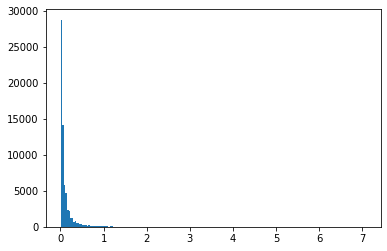

In [53]:
non_zero_speed = speed_gt > 1

density_gt = volume_gt/speed_gt
non_zero_density = density_gt > 0
non_outlier_densities = density_gt < 255

valid_indices = non_zero_density & non_zero_speed & non_outlier_densities

sprint ("\n", speed_gt.shape, non_zero_speed.shape, valid_indices.shape, non_zero_density.shape)
speed_gt = speed_gt[valid_indices].tolist()
speed_pred = speed_pred[valid_indices].tolist()
speed_unc = speed_unc[valid_indices].tolist()
speed_err = speed_err[valid_indices].tolist()

volume_gt = volume_gt[valid_indices].tolist()
volume_pred = volume_pred[valid_indices].tolist()
volume_unc = volume_unc[valid_indices].tolist()
volume_err = volume_err[valid_indices].tolist()

density_gt = density_gt[valid_indices].tolist()

import matplotlib.pyplot as plt
plt.hist(volume_gt, 200)
plt.show()

0.0 0.7070000000000001


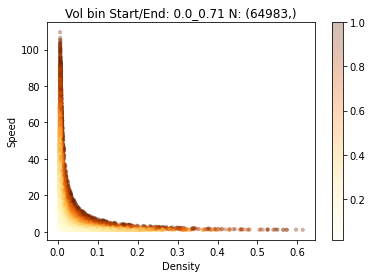

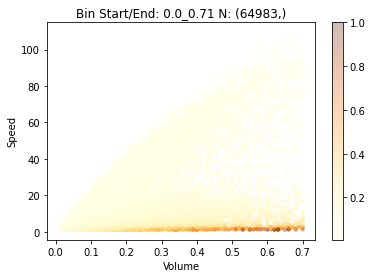

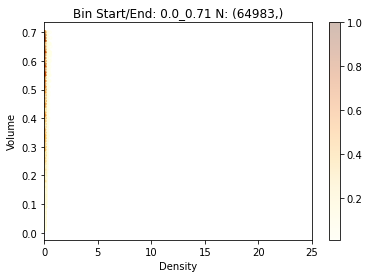

0.7070000000000001 1.4140000000000001


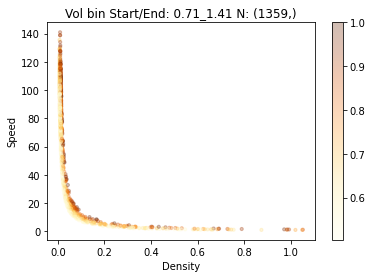

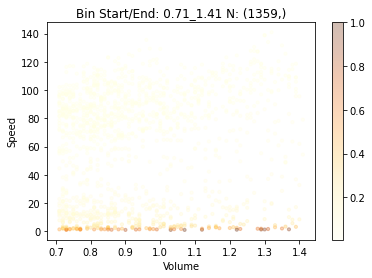

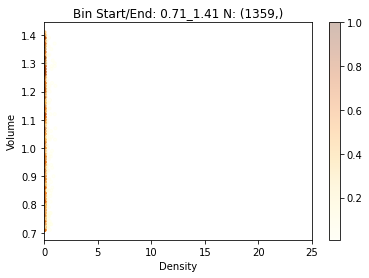

1.4140000000000001 2.1210000000000004


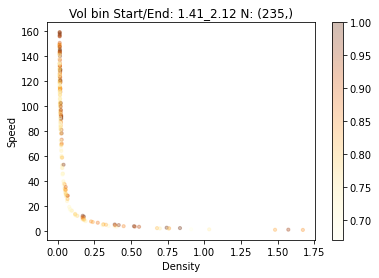

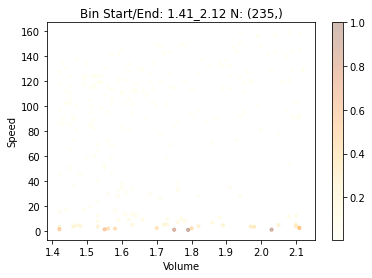

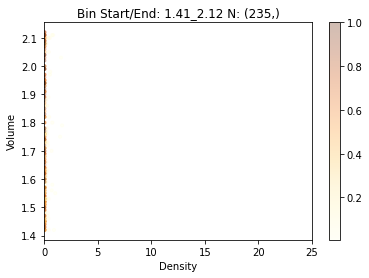

2.1210000000000004 2.8280000000000003


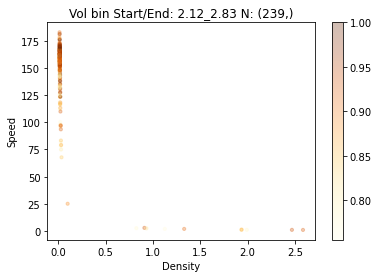

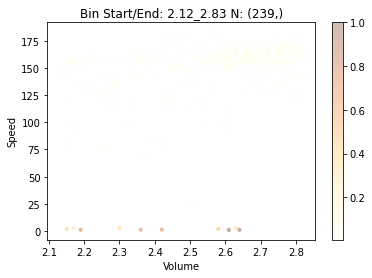

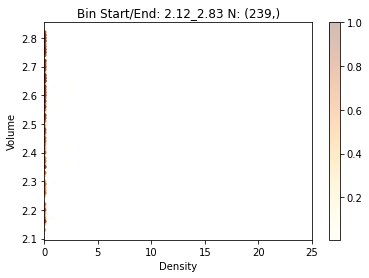

2.8280000000000003 3.535


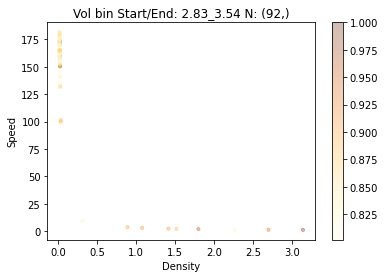

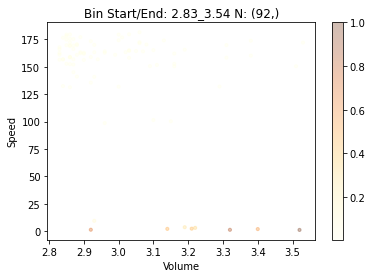

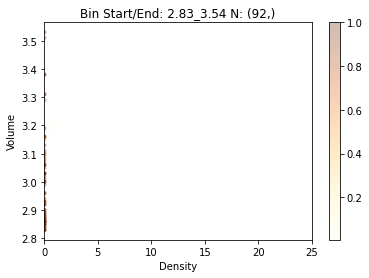

3.535 4.242


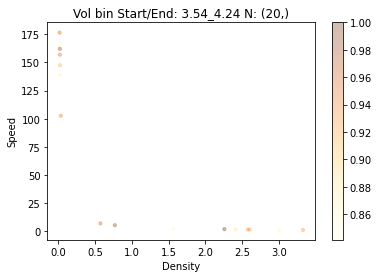

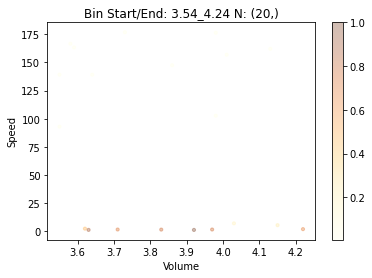

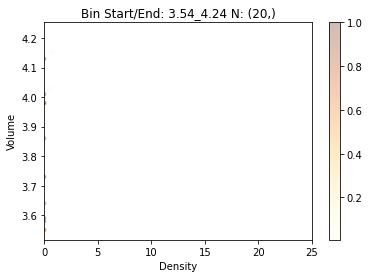

4.242000000000001 4.949000000000001


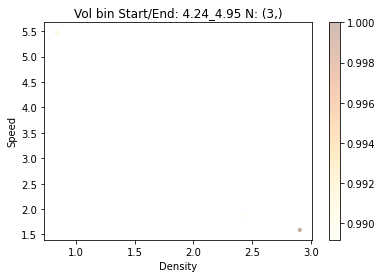

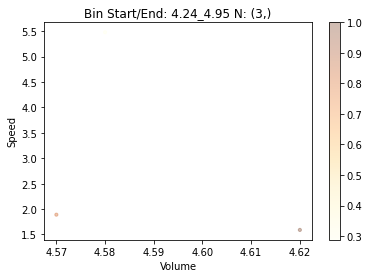

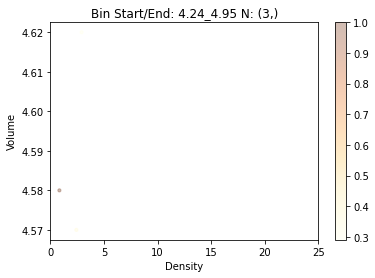

4.949000000000001 5.656000000000001


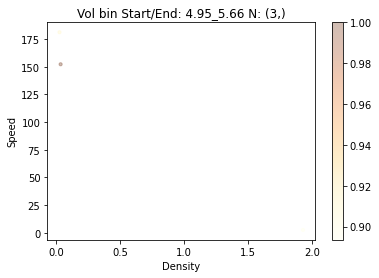

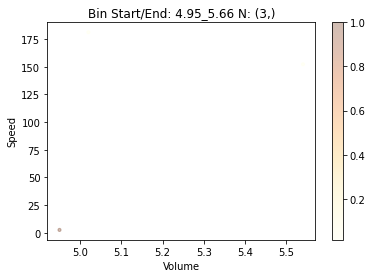

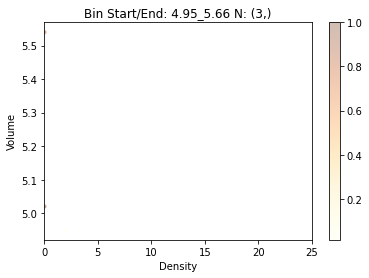

5.656000000000001 6.363


ValueError: zero-size array to reduction operation maximum which has no identity

In [58]:
import matplotlib.cm as cm

speed_gt_array = np.array(speed_gt)
volume_gt_array = np.array(volume_gt)
density_gt_array = np.array(density_gt)

speed_unc_array = np.array(speed_unc)
volume_unc_array = np.array(volume_unc)

max_vol = np.max(volume_gt)
N = 10
bin_size = max_vol / N

# def color_by_quantile(arr):
#     max_ = arr.max()
#     c = []
#     quantiles = np.quantile(arr, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
#     vals = quantiles * max_
#     print (quantiles)
#     print (vals)
# x = np.random.rand(20)
# print (x)
# color_by_quantile(x)
    


for bin_start in (np.arange(0, max_vol, bin_size)).tolist():
    bin_end = bin_start + bin_size
    print (bin_start, bin_end)
    
    speed_gt_filtered = speed_gt_array[(volume_gt_array<bin_end) 
                                       &
                                      (volume_gt_array>bin_start)]
    speed_unc_filtered = speed_unc_array[(volume_gt_array<bin_end) 
                                       &
                                      (volume_gt_array>bin_start)]
    density_gt_filtered = density_gt_array[(volume_gt_array<bin_end) 
                                       &
                                      (volume_gt_array>bin_start)]
    volume_gt_filtered = volume_gt_array[(volume_gt_array<bin_end) 
                                       &
                                      (volume_gt_array>bin_start)]    
    
#     c = cm.YlOrBr(density_gt_filtered/ np.max(density_gt_filtered))
#     c = c.tolist()
    
    c = volume_gt_filtered/ np.max(volume_gt_filtered)
    plt.scatter(density_gt_filtered, speed_gt_filtered, alpha=0.3, c=(c), s=10, cmap="YlOrBr")
    plt.title("Vol bin Start/End: " + str(round(bin_start,2)) + "_" + str(round(bin_end,2)) + " N: " + str(density_gt_filtered.shape))
    plt.colorbar()
    plt.ylabel("Speed")
    plt.xlabel("Density")    
#     plt.yscale("log")
    plt.show()

    c = density_gt_filtered/ np.max(density_gt_filtered)    
    plt.scatter(volume_gt_filtered, speed_gt_filtered, alpha=0.3, c=(c), s=10, cmap="YlOrBr")
    plt.title("Bin Start/End: " + str(round(bin_start,2)) + "_" + str(round(bin_end,2)) + " N: " + str(density_gt_filtered.shape))
    plt.colorbar()
    plt.ylabel("Speed")
    plt.xlabel("Volume")
    
#     plt.yscale("log")
    plt.show()
    
    c = speed_gt_filtered/ np.max(speed_gt_filtered)    
    plt.scatter(density_gt_filtered, volume_gt_filtered, alpha=0.3, c=(c), s=10, cmap="YlOrBr")
    plt.title("Bin Start/End: " + str(round(bin_start,2)) + "_" + str(round(bin_end,2)) + " N: " + str(density_gt_filtered.shape))
    plt.colorbar()
    plt.xlim(0, 25)
    plt.xlabel("Density")
    plt.ylabel("Volume")
#     plt.yscale("log")
    plt.show()
    
    
# c = density_gt_array/ np.max(density_gt_array)    
# plt.scatter(volume_gt_array, speed_gt_array, alpha=0.8, c=c, s=2, cmap="YlOrBr")
# plt.show()
    
# max_vol = np.max(volume_gt)
# N = 30
# bin_size = max_vol / N

# for bin_start in np.arange(0, max_vol, bin_size):
#     bin_end = bin_start + bin_size
#     print (bin_start, bin_end)
    
#     speed_gt_filtered = speed_gt_array[(volume_gt_array<bin_end) 
#                                        &
#                                       (volume_gt_array>bin_start)]
#     speed_unc_filtered = speed_unc_array[(volume_gt_array<bin_end) 
#                                        &
#                                       (volume_gt_array>bin_start)]
#     density_gt_filtered = density_gt_array[(volume_gt_array<bin_end) 
#                                        &
#                                       (volume_gt_array>bin_start)]
#     volume_gt_filtered = volume_gt_array[(volume_gt_array<bin_end) 
#                                        &
#                                       (volume_gt_array>bin_start)]
    
    
# #     c = cm.YlOrBr(density_gt_filtered/ np.max(density_gt_filtered))
# #     c = c.tolist()
    
#     c = density_gt_filtered/ np.max(density_gt_filtered)
    
#     plt.scatter(volume_gt_array, speed_gt_filtered, alpha=0.5, c=c, s=0.6, cmap="YlOrBr")
#     plt.title("Bin Start/End: " + str(round(bin_start,2)) + "_" + str(round(bin_end,2)) + " N: " + str(density_gt_filtered.shape))
#     plt.colorbar()
# #     plt.yscale("log")
#     plt.show()    

In [15]:
density_gt_filtered

array([], dtype=float64)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(volume_gt, speed_gt, s=2, alpha=1)
# plt.xlim(0, 5)
plt.title("Speed-gt vs Volume-gt Scatter")
plt.ylabel("Speed")
plt.xlabel("Volume")
plt.show()


import matplotlib.pyplot as plt
plt.scatter(density_gt, speed_gt, s=2, alpha=1)
# plt.xlim(0, 0.5)
plt.title("Speed-gt vs density Scatter")
plt.ylabel("Speed")
plt.xlabel("Density")
plt.show()


import matplotlib.pyplot as plt
plt.scatter(density_gt, volume_gt, s=2, alpha=1)
plt.title("Volume-gt vs density Scatter")
plt.ylabel("Volume")
plt.xlabel("Density")
plt.show()


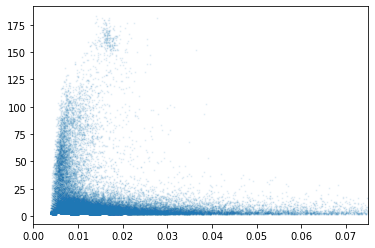

In [21]:
import matplotlib.pyplot as plt
plt.xlim(0, 0.075)
plt.scatter(density_gt, speed_gt, s=1, alpha=0.08)
plt.show()


In [12]:
density_gt_np = np.array(density_gt)
(density_gt_np.shape), (density_gt_np[density_gt_np>0.07]).shape

((12229,), (54,))

len(var) : 12229
len(var) : 12229
len(var) : 12229
len(var) : 12229
len(var) : 12229
len(var) : 12229


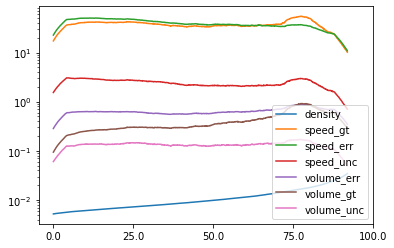

len(var) : 12229
len(var) : 12229
len(var) : 12229
len(var) : 12229
len(var) : 12229
len(var) : 12229


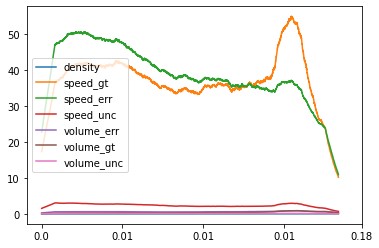

In [6]:
def sort_two_lists_according_to_first(X,Y):
    ss = sorted(zip(X, Y))
    X = [x for x, y in ss]
    Y = [y for x, y in ss]    
    return X, Y


import matplotlib.pyplot as plt
import numpy as np


smoothing_window = 1001


X, _ = sort_two_lists_according_to_first(density_gt, speed_gt)
plt.plot(X[smoothing_window//2:-smoothing_window//2], label="density")    

names = ['speed_gt', 'speed_err', 'speed_unc', 'volume_err', 'volume_gt', 'volume_unc']
for index, var in enumerate([speed_gt, speed_err, speed_unc, volume_err, volume_gt, volume_unc]):
    
    sprint (len(var))
    _, Y = sort_two_lists_according_to_first(density_gt, var)
    Y = Y[smoothing_window//2:-smoothing_window//2]
    
    plt.plot(np.convolve(Y, [1/smoothing_window]*smoothing_window, "same"), label=names[index])
#     plt.show()
plt.yscale("log")
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
plt.xticks(((len(X)-1) * p/100), map(str, p))
plt.legend()
plt.show()




############ Same thing with absolute values of quantiles on the xticks
def sort_two_lists_according_to_first(X,Y):
    ss = sorted(zip(X, Y))
    X = [x for x, y in ss]
    Y = [y for x, y in ss]    
    return X, Y


import matplotlib.pyplot as plt
import numpy as np



X, _ = sort_two_lists_according_to_first(density_gt, speed_gt)
plt.plot(X[smoothing_window//2:-smoothing_window//2], label="density")    

names = ['speed_gt', 'speed_err', 'speed_unc', 'volume_err', 'volume_gt', 'volume_unc']
for index, var in enumerate([speed_gt, speed_err, speed_unc, volume_err, volume_gt, volume_unc]):
    
    sprint (len(var))
    _, Y = sort_two_lists_according_to_first(density_gt, var)
    Y = Y[smoothing_window//2:-smoothing_window//2]
    
    plt.plot(np.convolve(Y, [1/smoothing_window]*smoothing_window, "same"), label=names[index])
#     plt.show()
# plt.yscale("log")

pos = np.array([0.0, 25.0, 50.0, 75.0, 99.0])
perc = np.round(np.percentile(X, p), 2)

plt.xticks(((len(X)-1) * pos/100), map(str, perc))
plt.legend()
plt.show()



len(var) : 12229


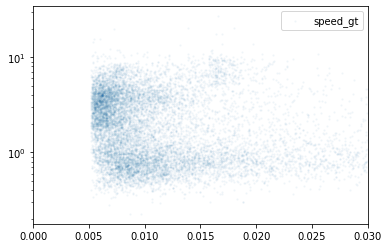

In [7]:
def sort_two_lists_according_to_first(X,Y):
    ss = sorted(zip(X, Y))
    X = [x for x, y in ss]
    Y = [y for x, y in ss]    
    return X, Y


import matplotlib.pyplot as plt
import numpy as np


smoothing_window = 1001


X, _ = sort_two_lists_according_to_first(density_gt, speed_gt)
# plt.plot(X[smoothing_window//2:-smoothing_window//2], label="density")    

names = ['speed_gt', 'speed_err', 'speed_unc', 'volume_err', 'volume_gt', 'volume_unc']
for index, var in enumerate([speed_unc]):
    
    sprint (len(var))
    _, Y = sort_two_lists_according_to_first(density_gt, var)
    Y = Y[smoothing_window//2:-smoothing_window//2]
    
#     plt.plot(np.convolve(Y, [1/smoothing_window]*smoothing_window, "same"), label=names[index])
    plt.scatter(X[smoothing_window//2:-smoothing_window//2], 
                Y, label=names[index], s=2, alpha=0.04)
#     plt.show()
plt.yscale("log")
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
# plt.xticks(((len(X)-1) * p/100), map(str, p))
plt.xlim(0, 0.03)
plt.legend()
plt.show()




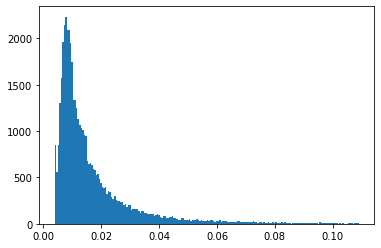

In [7]:
l = len(X)
plt.hist(X[:int(l*0.99)], 200)
plt.show()

In [8]:
np.percentile(X, p)

array([3.92156863e-03, 1.06007067e-02, 1.96850394e-02, 5.30303030e-02,
       1.75000000e+02])

len(U), len(S), len(D) : 118715 118715 118715


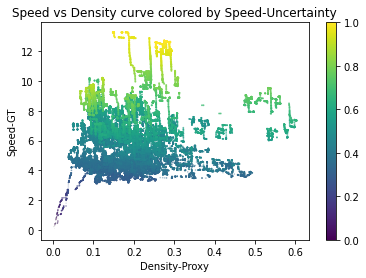

In [9]:
# speed density plots
def sort_three_lists_according_to_first(X,Y,Z):
    ss = sorted(zip(X, Y, Z))
    X = [x for x,y,z in ss]
    Y = [y for x,y,z in ss]
    Z = [z for x,y,z in ss]
    return X, Y, Z

def conv(X):
    return np.convolve(X, [1/smoothing_window]*smoothing_window)
                       
import matplotlib.cm as cm


U, D, S = sort_three_lists_according_to_first(conv(speed_unc), conv(density_gt), conv(speed_gt))
sprint (len(U), len(S), len(D))
max_99 = 0.99 * np.max(U)
c = cm.viridis(np.array(U)/ max_99)
c = c.tolist()

plt.scatter(D, S, color=c, s=(np.array(U)), alpha=np.clip(np.array(U)/ max_99, 0,1))
# plt.yscale("log")
# plt.xscale("log")
# plt.xlim(0,0.2)
# plt.ylim(0,20)
plt.colorbar()
plt.xlabel("Density-Proxy")
plt.ylabel("Speed-GT")
plt.title("Speed vs Density curve colored by Speed-Uncertainty")
plt.show()

len(U), len(S), len(D) : 118715 118715 118715


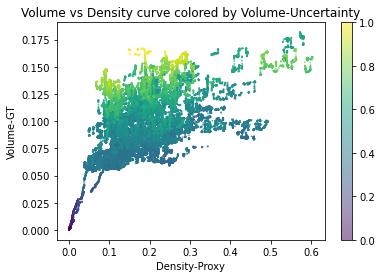

In [10]:
# speed density plots
def sort_three_lists_according_to_first(X,Y,Z):
    ss = sorted(zip(X, Y, Z))
    X = [x for x,y,z in ss]
    Y = [y for x,y,z in ss]
    Z = [z for x,y,z in ss]
    return X, Y, Z

def conv(X):
    return np.convolve(X, [1/smoothing_window]*smoothing_window)
                       
import matplotlib.cm as cm


U, D, V = sort_three_lists_according_to_first(conv(volume_unc), conv(density_gt), conv(volume_gt))
sprint (len(U), len(S), len(D))

max_99 = 0.99 * np.max(U)
c = cm.viridis(np.array(U)/ max_99)
c = c.tolist()

plt.scatter(D, V, color=c, s=1, alpha=0.5) # np.clip(np.array(U)/ max_99, 0,1))
# plt.yscale("log")
# plt.xscale("log")
# plt.xlim(0,0.2)
# plt.ylim(0,20)
plt.colorbar()
plt.xlabel("Density-Proxy")
plt.ylabel("Volume-GT")
plt.title("Volume vs Density curve colored by Volume-Uncertainty")
plt.show()

In [ ]:
plt.hist(U, 209)
plt.xlim(0,6)
plt.title("V")
plt.show()

In [ ]:
U[-1]

In [ ]:
cm.GnBu